In [1]:
from copy import deepcopy
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from skimage.draw import line, disk
from scipy.optimize import minimize

In [2]:
import scipy.io
calorimeter_response_protons = scipy.io.loadmat("calorimeter_response.mat")
secondary_protons = scipy.io.loadmat("secondary.mat")
calorimeter_response_antiprotons = scipy.io.loadmat("calorimeter_response_antiprotons.mat")
secondary_antiprotons = scipy.io.loadmat("secondary_antiprotons.mat")

In [3]:
data = deepcopy(calorimeter_response_protons)

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:20 2024',
 '__version__': '1.0',
 '__globals__': [],
 'E_0': array([[1745.39, 2859.57, 1433.08, ..., 4222.97, 6916.87, 6589.18]]),
 'X_0': array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]]),
 'Y_0': array([[ 11.0633, -85.0243, -33.8059, ...,  22.3615,  62.9135,  47.3031]]),
 'theta_0': array([[0.503032 , 0.56611  , 0.0662649, ..., 0.768048 , 0.606821 ,
         0.0842612]]),
 'phi_0': array([[0.17943, 4.36732, 2.73976, ..., 3.22291, 3.3012 , 3.24898]]),
 'Z_end': array([[139.821  ,   3.40819, 213.576  , ..., 101.     , 125.106  ,
         213.576  ]]),
 'last_process': array(['protonInelastic', 'protonInelastic', 'Transportation ', ...,
        'protonInelastic', 'Transportation ', 'Transportation '],
       dtype='<U15'),
 'event_ID': array([[   0.,    0.,    0., ..., 9999., 9999., 9999.]]),
 'layer': array([[ 0.,  1.,  2., ..., 41., 42., 43.]]),
 'index_along_x': array([[19., 20

In [5]:
X = data['X_0']
shape_X = X.shape
shape_X


(1, 10000)

In [29]:
#np.set_printoptions(threshold=np.inf)

last_proc= data['last_process']
last_proc[12]

'protonInelastic'

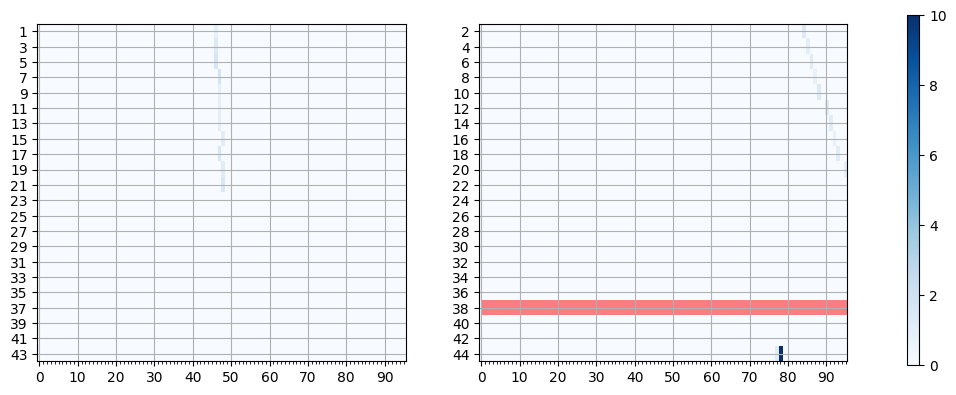

In [30]:
# Изображение проекции калориметра
calo_events[12].plot()

In [7]:
plane_yz_np_data = np.array(data['X_0'])
plane_xz_np_data = np.array(data['Y_0'])
plane_yz_np_data

array([[-72.9942, -37.1207, -69.118 , ...,  47.0039, -61.3038, -20.493 ]])

In [8]:
secondary_protons

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 21 14:33:22 2024',
 '__version__': '1.0',
 '__globals__': [],
 'secondary': array([[array([[ 1.00000e+00,  2.21200e+03, -7.29942e+01,  1.10633e+01,
                 -1.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.24528e+01,  1.11615e+01,
                  0.00000e+00,  1.74539e+03],
                [ 1.00000e+00,  2.21200e+03, -7.22470e+01,  1.11989e+01,
                  3.80000e-01,  1.74523e+03],
                ...,
                [ 2.00000e+00,  1.10000e+01, -5.99821e+01,  1.37972e+01,
                  2.41625e+01,  1.38636e-01],
                [ 2.00000e+00,  1.10000e+01, -5.99977e+01,  1.38232e+01,
                  2.41018e+01,  9.32497e-02],
                [ 2.00000e+00,  1.10000e+01, -6.00138e+01,  1.38341e+01,
                  2.40692e+01,  0.00000e+00]])                          ,
         array([[ 1.00000e+00,  2.21200e+03, -3.71207e+01, -8.50243e+01,
               

In [9]:
sys.path.append(r'/Users/pavelnehaenko/Downloads/pamela-master/src')  

In [10]:
from calorimeter import calo_importer

In [11]:
fnum = 1
dpath = '/Users/pavelnehaenko/Desktop/me/kursach/simulation' 
siminfofile = 'protons/SimInfo/SimInfo_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
siminfo_data = scipy.io.loadmat(os.path.join(dpath, siminfofile), variable_names=['caloplaneint', 'fTHETA', 'fPHI'])

In [12]:
siminfo_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Dec 26 08:55:45 2021',
 '__version__': '1.0',
 '__globals__': [],
 'caloplaneint': array([[ 9],
        [44],
        [44],
        ...,
        [31],
        [44],
        [44]], dtype=uint8),
 'fPHI': array([[2.88771],
        [2.04032],
        [5.38962],
        ...,
        [5.56478],
        [1.8101 ],
        [2.51839]]),
 'fTHETA': array([[0.10897  ],
        [0.0970378],
        [0.107277 ],
        ...,
        [0.270176 ],
        [0.166132 ],
        [0.272713 ]])}

In [13]:
nn = range(1, 1001)
dfile = 'protons/CaloStrip/CaloStrip_pr_0p1_1500_rig_F0p8_10000000_1.mat'.format(fnum)
calo_events = calo_importer.import_data(os.path.join(dpath, dfile), events=nn)

.mat file loaded


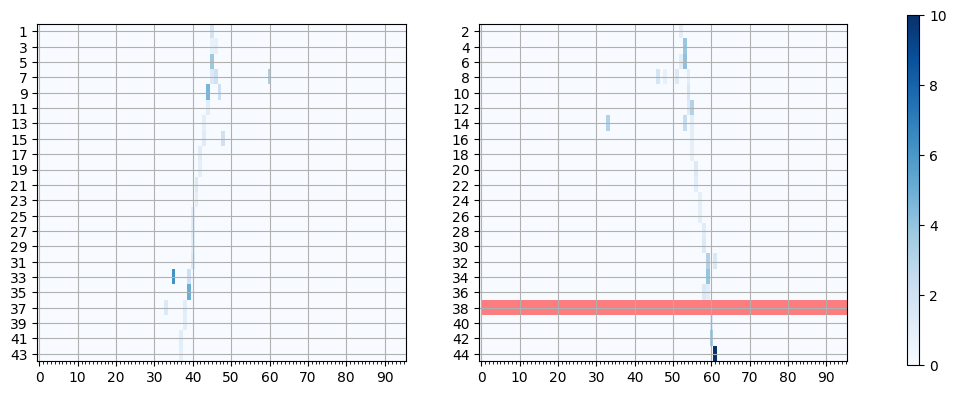

In [14]:
# Изображение проекции калориметра
calo_events[102].plot()

In [ ]:
Image('1.jpg')

In [ ]:
Image('2.jpg')

In [ ]:
# целевая функция с мягкими ограничениями, где 
# error_c - штраф за отклонение от c_jk
# error_d - штраф за отклонение от d_ik

def objective(x):
    x_ijk = x.reshape((I, J, K))
    error_c = np.sum((np.sum(x_ijk, axis=0) - c_jk) ** 2)  
    error_d = np.sum((np.sum(x_ijk, axis=1) - d_ik) ** 2)  
    return error_c + error_d

In [ ]:
numm = 130
theta_0 = data['theta_0'][0, numm]
phi_0 = data['phi_0'][0, numm]
X_0 = data['X_0'][0, numm]
Y_0 = data['Y_0'][0, numm]
Z_end = data['Z_end'][0, numm]

x_projection = calo_events[numm].x_projection()
y_projection = calo_events[numm].y_projection()

I = 22
J = 22
K = 96 
x0 = np.ones(I * J * K)

c_jk = np.zeros((J, K))  
d_ik = np.zeros((I, K))  

for j in range(J):
    for k in range(K):
        if x_projection[j, k] != 0:
            c_jk[j, k] = x_projection[j, k]  
        if y_projection[j, k] != 0:
            d_ik[j, k] = y_projection[j, k]  
            
# ограничения (все значения должны быть неотрицательными)
bounds = [(0, None) for _ in range(I * J * K)]

#res = minimize(objective, x0, method='trust-constr', bounds=bounds, options={'disp': True, 'maxiter': 1000})
# res = minimize(objective, x0, method='L-BFGS-B', bounds=bounds, options={'disp': True, 'maxiter': 1000, 'maxfun': 100000})


#if res.success:
 #   x_ijk = res.x.reshape((I, J, K))
  #  print("Решение найдено")
#else:
 #   print("Решение не найдено:", res.message)



In [ ]:
res1 = minimize(
    objective, x0, 
    method='trust-constr', 
    bounds=bounds,
    options={
        'disp': True, 
        'maxiter': 500, 
        'gtol': 1e-4,
        'verbose': 3  # Уровень детализации
    }
)

if res1.success:
    x_ijk = res1.x.reshape((I, J, K))
    print("Решение найдено")
else:
    print("Решение не найдено:", res1.message)


In [ ]:
np.set_printoptions(threshold=np.inf)
c_jk

In [ ]:
print(c_jk, d_ik, x_ijk.min(),x_ijk.max()) 

In [ ]:
theta_rad = np.radians(theta_0)
phi_rad = np.radians(phi_0)

steps = 50  
t = np.linspace(0, , steps) 

X = X_0 + t * (Z_end - X_0) * np.sin(theta_rad) * np.cos(phi_rad)
Y = Y_0 + t * (Z_end - Y_0) * np.sin(theta_rad) * np.sin(phi_rad)
Z = Z_end * t * x_ijk[0, 0, :]  * np.cos(theta_rad)

sizes = np.mean(x_ijk, axis=(0, 1))  
sizes = sizes[:steps]  
if sizes.shape[0] < steps: 
    sizes = np.pad(sizes, (0, steps - sizes.shape[0]), 'edge')

print("Размерность X:", len(X), ", Размерность Y:", len(Y), ", Размерность Z:", len(Z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X, Y, Z, s=sizes * 10, c=sizes, cmap='viridis', alpha=0.7)

ax.set_xlabel('X координаты')
ax.set_ylabel('Y координаты')
ax.set_zlabel('Z координаты')
ax.set_title('3D Модель Полета Частицы')

cbar = plt.colorbar(scatter)
cbar.set_label('Размеры точек')
plt.show()

In [ ]:
# Углы в радианах
theta_rad = np.radians(theta_0)
phi_rad = np.radians(phi_0)

# Задаем новые пределы для t
t_max = Z_end / np.cos(theta_rad)
steps = 50  
t = np.linspace(0, t_max, steps)  # Изменяем значение t от 0 до t_max

# Обновляем формулы для X, Y и Z
X = X_0 + t * np.sin(theta_rad) * np.cos(phi_rad)
Y = Y_0 + t * np.sin(theta_rad) * np.sin(phi_rad)
Z = t * np.cos(theta_rad)  # Обновленная формула для Z(t)

sizes = np.mean(x_ijk, axis=(0, 1))  
sizes = sizes[:steps]  
if sizes.shape[0] < steps: 
    sizes = np.pad(sizes, (0, steps - sizes.shape[0]), 'edge')

print("Размерность X:", len(X), ", Размерность Y:", len(Y), ", Размерность Z:", len(Z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X, Y, Z, s=sizes * 10, c=sizes, cmap='viridis', alpha=0.7)

ax.set_xlabel('X координаты')
ax.set_ylabel('Y координаты')
ax.set_zlabel('Z координаты')
ax.set_title('3D Модель Полета Частицы')

cbar = plt.colorbar(scatter)
cbar.set_label('Размеры точек')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Предполагаем, что res уже получен после оптимизации и res.success == True
if res1.success:
    x_ijk = res1.x.reshape((I, J, K))  # Преобразуем решение в трёхмерный массив
    print("Решение найдено")
else:
    print("Решение не найдено:", res.message)
    exit()

# Преобразование углов в радианы для параметризации
theta_rad = np.radians(theta_0)
phi_rad = np.radians(phi_0)

# Параметр t, представляющий положение частицы вдоль трека
steps = 50  # Количество шагов для визуализации
t = np.linspace(0, 1, steps)

# Использование оптимизированных значений для определения координат X, Y, Z
# Координаты X и Y зависят от углов и параметра t, а также от энерговыделений из x_ijk
X = X_0 + t * (Z_end - X_0) * np.sin(theta_rad) * np.cos(phi_rad) * np.mean(x_ijk, axis=(1, 2))[:steps]
Y = Y_0 + t * (Z_end - Y_0) * np.sin(theta_rad) * np.sin(phi_rad) * np.mean(x_ijk, axis=(0, 2))[:steps]
Z = Z_end * t * np.mean(x_ijk, axis=(0, 1))[:steps]  # Используем среднее распределение по слоям для определения глубины

# Использование данных энерговыделений для задания размеров точек и их цветовой кодировки
sizes = np.mean(x_ijk, axis=(0, 1))  # Среднее значение энерговыделений по слоям для оси глубины
sizes = sizes[:steps]
if sizes.shape[0] < steps:  # Если значений меньше, чем шагов t, дополняем
    sizes = np.pad(sizes, (0, steps - sizes.shape[0]), 'edge')

# Печать размерностей для проверки
print("Размерность X:", len(X), ", Размерность Y:", len(Y), ", Размерность Z:", len(Z))

# Визуализация 3D траектории частицы
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение трека с использованием рассчитанных размеров и цветовой кодировки
scatter = ax.scatter(X, Y, Z, s=sizes * 10, c=sizes, cmap='viridis', alpha=0.7)

# Оформление графика
ax.set_xlabel('X координаты')
ax.set_ylabel('Y координаты')
ax.set_zlabel('Z координаты')
ax.set_title('3D Модель Полета Частицы')

# Добавление цветовой шкалы для представления интенсивности
cbar = plt.colorbar(scatter)
cbar.set_label('Размеры точек')
plt.show()

In [ ]:
for i in range(calo_events[20].x_projection().shape[0]):
    print("слой {}: {}".format(i+1, calo_events[20].x_projection()[i, :]))


In [ ]:
# построение вектора v
v_x = np.sin(theta_0) * np.cos(phi_0)
v_y = np.sin(theta_0) * np.sin(phi_0)
v_z = np.cos(theta_0)

t_end = Z_end / v_z

print("Векторы v:", v_x, v_y, v_z)
print("t_end:", t_end)

In [ ]:
print(data['X_0'][0,20], data['Y_0'][0,20])

In [ ]:
x_projection = calo_events[20].x_projection()
y_projection = calo_events[20].y_projection()

x_projection